In [8]:
import numpy as np
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from sqlalchemy import create_engine
import psycopg2
import os
import plotly.figure_factory as ff
import plotly.express as px
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')

In [2]:
engine = create_engine('postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}'.format(
    user = 'postgres',
    password = POSTGRES_PASSWORD,
    host = 'postgres',
    port = 5432,
    db = 'congress'
))

In [5]:
myquery = '''
SELECT directordername, bioguideid
FROM members
WHERE lastname='Good'
'''
members = pd.read_sql_query(myquery, con=engine)

In [6]:
members

,directordername,bioguideid
0,Bob Good,G000595


In [76]:
userbioguideid = 'G000595'

myquery = '''
SELECT *
FROM members
'''
ideo = pd.read_sql_query(myquery, con=engine)
ideo['senate'] = ideo['district'].isnull()
replace_map = {'R': 'Republican',
              'D': 'Democrat',
              'I': 'Independent'}
ideo['party'] = ideo['party'].replace(replace_map)
ideo['name'] = [n + ' (' + x + '-' + str(int(y)) + ')' if not z else n + ' (' + x + ')' for n, x, y, z in zip(ideo['directordername'], ideo['state'], ideo['district'], ideo['senate'])]
ideo2 = ideo.query(f"bioguideid == '{userbioguideid}'")

In [77]:
ideo2

,bioguideid,birthyear,currentmember,directordername,firstname,honorificname,invertedordername,lastname,officialwebsiteurl,state,...,middlename,suffixname,nickname,district,cid,party,icpsr,ideology,senate,name
432,G000595,1965,True,Bob Good,Bob,Mr.,"Good, Bob",Good,https://good.house.gov,Virginia,...,None,None,None,5.0,N00045557,Republican,22120,0.8,False,Bob Good (Virginia-5)


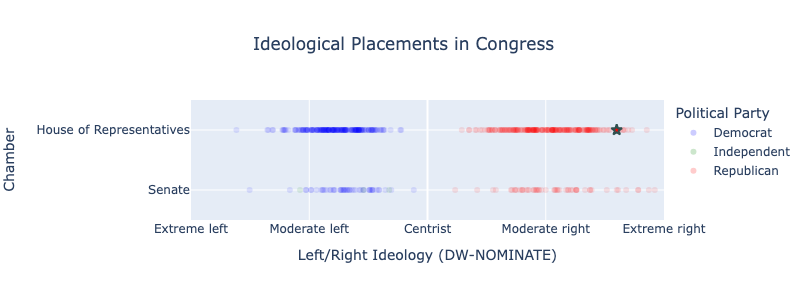

In [94]:
fig = px.scatter(ideo, x='ideology', y='senate', color='party',
                 color_discrete_map={'Republican': 'red',
                                     'Democrat': 'blue',
                                     'Independent': 'green'},
                 height=300, width=600,
                 labels={'ideology':'Left/Right Ideology (DW-NOMINATE)', 
                        'senate':'Chamber',
                        'party': 'Political Party'},
                 hover_name = 'name',
                 hover_data=['party'],
                 title = 'Ideological Placements in Congress',
                opacity = .1)
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_yaxes(range=(-0.5, 1.5), tickvals=[0, 1],
                ticktext = ['Senate', 'House of Representatives'])
fig.update_xaxes(range=(-1,1), tickvals=[-1, -.5, 0, .5, 1],
                ticktext = ['Extreme left', 'Moderate left', 'Centrist', 'Moderate right', 'Extreme right'])

fig.add_traces(
    px.scatter(ideo2, x='ideology', y='senate', color='party',
                 color_discrete_map={'Republican': 'red',
                                     'Democrat': 'blue',
                                     'Independent': 'green'},
                 height=300, width=600,
                 labels={'ideology':'Left/Right Ideology (DW-NOMINATE)', 
                        'senate':'Chamber',
                        'party': 'Political Party'},
                 hover_name = 'name',
                 hover_data=['party'],
                 title = 'Ideological Placements in Congress').update_traces(marker=dict(size=8, symbol="star", line=dict(width=2, color="DarkSlateGrey")),
                                                                            showlegend=False).data
)


fig.show()

In [27]:
ideo['district'].isnull().value_counts()

district
False    425
True     105
Name: count, dtype: int64

['Ohio',
 'Washington',
 'Maryland',
 'Delaware',
 'Pennsylvania',
 'Minnesota',
 'New Jersey',
 'Vermont',
 'Michigan',
 'Montana',
 'Rhode Island',
 'Wyoming',
 'Mississippi',
 'Maine',
 'Texas',
 'Illinois',
 'South Carolina',
 'Kentucky',
 'Oregon',
 'Rhode Island',
 'Idaho',
 'New Hampshire',
 'Virginia',
 'New York',
 'Delaware',
 'West Virginia',
 'Alabama-4',
 'Wisconsin',
 'Colorado',
 'Florida-12',
 'Georgia-2',
 'Tennessee',
 'Oregon-3',
 'Connecticut',
 'Arkansas',
 'Florida-16',
 'Indiana-8',
 'Texas-26',
 'California-41',
 'West Virginia',
 'Indiana-7',
 'Texas-31',
 'Louisiana',
 'Florida-14',
 'California-28',
 'New York-9',
 'Missouri-5',
 'South Carolina-6',
 'Tennessee-9',
 'Oklahoma-4',
 'Virginia-11',
 'California-21',
 'Connecticut-2',
 'Idaho',
 'Arkansas-1',
 'Texas-28',
 'Illinois-7',
 'Colorado-1',
 'Connecticut-3',
 'Tennessee-4',
 'Florida-26',
 'Texas-37',
 'South Carolina-3',
 'California-16',
 'Tennessee-3',
 'North Carolina-5',
 'California-8',
 'Arizona

In [58]:
ideo['district'].isnull()

0       True
1       True
2       True
3       True
4       True
       ...  
525    False
526    False
527     True
528     True
529    False
Name: district, Length: 530, dtype: bool